In [21]:
  
# 📦 Importation des bibliothèques  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import pickle  
import os  
from sklearn.metrics.pairwise import cosine_similarity  
from collections import Counter  
import warnings  
warnings.filterwarnings("ignore")  

In [22]:
# 📊 Chargement des données préparées  
print("Chargement des données préparées...")  
try:  
    # Essayer de charger depuis le fichier pickle  
    with open('../data/processed/clean_dataset.pkl', 'rb') as f:  
        df = pickle.load(f)  
    print("Données chargées depuis le fichier pickle.")  
except:  
    # Sinon, charger depuis le CSV  
    df = pd.read_csv('../data/processed/clean_dataset.csv')  
    print("Données chargées depuis le fichier CSV.")  

Chargement des données préparées...
Données chargées depuis le fichier pickle.


In [23]:
# Création d'un DataFrame avec des produits uniques pour l'évaluation  
products_df = df.drop_duplicates('Product Id')  
print(f"Nombre de produits uniques: {len(products_df)}")  

Nombre de produits uniques: 4802


In [24]:
# 📊 Chargement des résultats des différents modèles  
print("\nChargement des résultats des différents modèles...")  
  
# Création des dossiers s'ils n'existent pas  
os.makedirs('../results', exist_ok=True)  
  
# Chargement des résultats du filtrage collaboratif  
try:  
    with open('../results/collaborative_filtering_results.pkl', 'rb') as f:  
        collab_results = pickle.load(f)  
    print("Résultats du filtrage collaboratif chargés.")  
except:  
    print("Erreur: Impossible de charger les résultats du filtrage collaboratif.")  
    collab_results = {  
        'collaborative_filtering': {  
            'svd': {'rmse': 0, 'mae': 0},  
            'knn': {'rmse': 0, 'mae': 0}  
        }  
    }  


Chargement des résultats des différents modèles...
Résultats du filtrage collaboratif chargés.


In [25]:
# Chargement des résultats du filtrage basé sur le contenu (TF-IDF)  
try:  
    with open('../results/tfidf_results.pkl', 'rb') as f:  
        tfidf_results = pickle.load(f)  
    print("Résultats du filtrage basé sur le contenu (TF-IDF) chargés.")  
except:  
    print("Erreur: Impossible de charger les résultats du filtrage basé sur le contenu (TF-IDF).")  
    tfidf_results = {'tfidf_knn': {'category_precision': 0}}  
  
# Chargement des résultats du filtrage basé sur le contenu (BERT)  
try:  
    with open('../results/bert_results.pkl', 'rb') as f:  
        bert_results = pickle.load(f)  
    print("Résultats du filtrage basé sur le contenu (BERT) chargés.")  
except:  
    print("Erreur: Impossible de charger les résultats du filtrage basé sur le contenu (BERT).")  
    bert_results = {'bert_knn': {'category_precision': 0}}  
  
# Chargement des modèles pour l'évaluation avancée  
print("\nChargement des modèles pour l'évaluation avancée...")  
  
# Chargement du modèle TF-IDF et des vecteurs  
try:  
    with open('../models/content_based/tfidf_vectorizer.pkl', 'rb') as f:  
        tfidf_vectorizer = pickle.load(f)  
    with open('../models/content_based/tfidf_knn_model.pkl', 'rb') as f:  
        tfidf_knn_model = pickle.load(f)  
    print("Modèle TF-IDF + KNN chargé avec succès.")  
    tfidf_loaded = True  
except:  
    print("Erreur: Impossible de charger le modèle TF-IDF + KNN.")  
    tfidf_loaded = False  
  
# Chargement des embeddings BERT et du modèle KNN  
try:  
    with open('../models/content_based/bert_embeddings.pkl', 'rb') as f:  
        bert_embeddings = pickle.load(f)  
    with open('../models/content_based/bert_knn_model.pkl', 'rb') as f:  
        bert_knn_model = pickle.load(f)  
    print("Modèle BERT + KNN chargé avec succès.")  
    bert_loaded = True  
except:  
    print("Erreur: Impossible de charger le modèle BERT + KNN.")  
    bert_loaded = False  

Résultats du filtrage basé sur le contenu (TF-IDF) chargés.
Résultats du filtrage basé sur le contenu (BERT) chargés.

Chargement des modèles pour l'évaluation avancée...
Modèle TF-IDF + KNN chargé avec succès.
Modèle BERT + KNN chargé avec succès.


In [26]:
# 📊 Comparaison des modèles de filtrage collaboratif  
print("\n📊 Comparaison des modèles de filtrage collaboratif:")  
  
# Extraction des métriques  
svd_rmse = collab_results['collaborative_filtering']['svd']['rmse']  
svd_mae = collab_results['collaborative_filtering']['svd']['mae']  
knn_rmse = collab_results['collaborative_filtering']['knn']['rmse']  
knn_mae = collab_results['collaborative_filtering']['knn']['mae']  
  
# Création d'un DataFrame pour la comparaison  
collab_df = pd.DataFrame({  
    'Modèle': ['SVD', 'KNNBasic'],  
    'RMSE': [svd_rmse, knn_rmse],  
    'MAE': [svd_mae, knn_mae]  
})  
  
print(collab_df)  


📊 Comparaison des modèles de filtrage collaboratif:
     Modèle      RMSE       MAE
0       SVD  1.003413  0.884479
1  KNNBasic  1.003519  0.885486


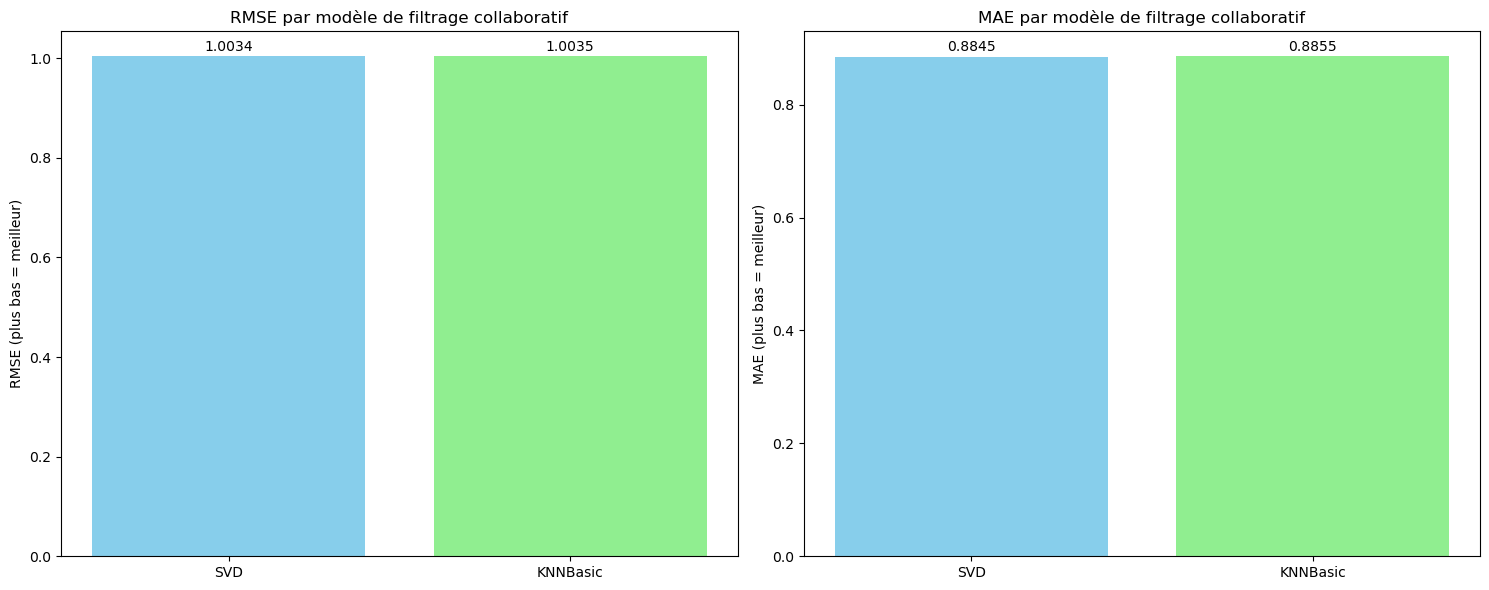

In [27]:
 #Visualisation des résultats  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  
  
# RMSE  
ax1.bar(collab_df['Modèle'], collab_df['RMSE'], color=['skyblue', 'lightgreen'])  
ax1.set_title('RMSE par modèle de filtrage collaboratif')  
ax1.set_ylabel('RMSE (plus bas = meilleur)')  
for i, v in enumerate(collab_df['RMSE']):  
    ax1.text(i, v + 0.01, f'{v:.4f}', ha='center')  
  
# MAE  
ax2.bar(collab_df['Modèle'], collab_df['MAE'], color=['skyblue', 'lightgreen'])  
ax2.set_title('MAE par modèle de filtrage collaboratif')  
ax2.set_ylabel('MAE (plus bas = meilleur)')  
for i, v in enumerate(collab_df['MAE']):  
    ax2.text(i, v + 0.01, f'{v:.4f}', ha='center')  
  
plt.tight_layout()  
plt.show()  

In [28]:
# 🔍 Fonctions d'évaluation avancées pour le filtrage basé sur le contenu  
print("\n🔍 Évaluation avancée des modèles de filtrage basé sur le contenu:")  



🔍 Évaluation avancée des modèles de filtrage basé sur le contenu:


In [29]:
  
# Calcul de Précision@k, Rappel@k et F1-score  
def calculate_precision_recall_f1(recommendations, relevant_items, k=5):  
    """  
    Calcule la Précision@k, le Rappel@k et le F1-score.  
      
    Args:  
        recommendations: Liste des éléments recommandés  
        relevant_items: Liste des éléments pertinents  
        k: Nombre d'éléments à considérer  
      
    Returns:  
        precision, recall, f1: Les métriques calculées  
    """  
    recommendations_k = recommendations[:k]  
    relevant_and_recommended = set(recommendations_k) & set(relevant_items)  
      
    precision = len(relevant_and_recommended) / len(recommendations_k) if recommendations_k else 0  
    recall = len(relevant_and_recommended) / len(relevant_items) if relevant_items else 0  
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0  
      
    return precision, recall, f1

In [30]:
  
# Calcul de la nouveauté  
def calculate_novelty(recommendations, item_popularity, k=5):  
    """  
    Calcule la nouveauté des recommandations.  
      
    Args:  
        recommendations: Liste des éléments recommandés  
        item_popularity: Dictionnaire {item: score de popularité}  
        k: Nombre d'éléments à considérer  
      
    Returns:  
        novelty: La nouveauté calculée  
    """  
    recommendations_k = recommendations[:k]  
    if not recommendations_k:  
        return 0  
      
    # La nouveauté est inversement proportionnelle à la popularité  
    total_novelty = 0  
    for item in recommendations_k:  
        popularity = item_popularity.get(item, 0)  
        # Transformation logarithmique pour atténuer l'effet des valeurs extrêmes  
        novelty = -np.log2(popularity) if popularity > 0 else 0  
        total_novelty += novelty  
      
    average_novelty = total_novelty / len(recommendations_k)  
    return average_novelty  
  

In [33]:
# Évaluation avancée des modèles de filtrage basé sur le contenu    
if tfidf_loaded and bert_loaded:    
    print("\n📊 Évaluation avancée des modèles de filtrage basé sur le contenu:")    
        
    # Préparation des données pour l'évaluation    
    # Calcul de la popularité des produits (nombre d'interactions)    
    product_popularity = Counter(df['Product Id'])    
    total_interactions = sum(product_popularity.values())    
    # Normalisation de la popularité    
    product_popularity = {k: v / total_interactions for k, v in product_popularity.items()}    
      
    # Création de la matrice TF-IDF - AJOUT DE CETTE LIGNE  
    tfidf_matrix = tfidf_vectorizer.transform(products_df['Full_Text'])  
        
    # Initialisation des métriques (uniquement celles demandées)    
    metrics = {    
        'tfidf': {    
            'precision@5': [],    
            'recall@5': [],    
            'novelty': []    
        },    
        'bert': {    
            'precision@5': [],    
            'recall@5': [],    
            'novelty': []    
        }    
    }    
    # Échantillonnage pour l'évaluation  
    sample_size = min(100, len(products_df))  
    sample_indices = np.random.choice(len(products_df), sample_size, replace=False)  
      
    # Évaluation pour chaque produit échantillonné  
    for idx in sample_indices:  
        product = products_df.iloc[idx]  
        product_id = product['Product Id']  
        product_category = product['Product Category']  
          
        # Trouver les produits pertinents (même catégorie)  
        relevant_products = products_df[products_df['Product Category'] == product_category]['Product Id'].tolist()  
        if product_id in relevant_products:  
            relevant_products.remove(product_id)  # Exclure le produit lui-même  
          
        # Si aucun produit pertinent, passer au suivant  
        if not relevant_products:  
            continue  
          
        # Évaluation du modèle TF-IDF + KNN  
        if tfidf_loaded:  
            tfidf_vector = tfidf_matrix[idx].reshape(1, -1)  
            tfidf_distances, tfidf_indices = tfidf_knn_model.kneighbors(tfidf_vector)  
              
            # Convertir les indices en IDs de produits  
            tfidf_recommendations = [products_df.iloc[idx]['Product Id'] for idx in tfidf_indices[0][1:6]]  
              
            # Calcul des métriques demandées  
            precision, recall, _ = calculate_precision_recall_f1(tfidf_recommendations, relevant_products, k=5)  
            novelty = calculate_novelty(tfidf_recommendations, product_popularity, k=5)  
              
            # Stockage des résultats  
            metrics['tfidf']['precision@5'].append(precision)  
            metrics['tfidf']['recall@5'].append(recall)  
            metrics['tfidf']['novelty'].append(novelty)  
          
        # Évaluation du modèle BERT + KNN  
        if bert_loaded:  
            bert_vector = bert_embeddings[idx].reshape(1, -1)  
            bert_distances, bert_indices = bert_knn_model.kneighbors(bert_vector)  
              
            # Convertir les indices en IDs de produits  
            bert_recommendations = [products_df.iloc[idx]['Product Id'] for idx in bert_indices[0][1:6]]  
              
            # Calcul des métriques demandées  
            precision, recall, _ = calculate_precision_recall_f1(bert_recommendations, relevant_products, k=5)  
            novelty = calculate_novelty(bert_recommendations, product_popularity, k=5)  
              
            # Stockage des résultats  
            metrics['bert']['precision@5'].append(precision)  
            metrics['bert']['recall@5'].append(recall)  
            metrics['bert']['novelty'].append(novelty)  
      
    # Calcul des moyennes pour chaque métrique  
    avg_metrics = {  
        'tfidf': {  
            'precision@5': np.mean(metrics['tfidf']['precision@5']),  
            'recall@5': np.mean(metrics['tfidf']['recall@5']),  
            'novelty': np.mean(metrics['tfidf']['novelty'])  
        },  
        'bert': {  
            'precision@5': np.mean(metrics['bert']['precision@5']),  
            'recall@5': np.mean(metrics['bert']['recall@5']),  
            'novelty': np.mean(metrics['bert']['novelty'])  
        }  
    }  

results_df = pd.DataFrame({
    'Modèle': ['TF-IDF + KNN', 'BERT + KNN'],
    'Précision@5': [avg_metrics['tfidf']['precision@5'], avg_metrics['bert']['precision@5']],
    'Rappel@5': [avg_metrics['tfidf']['recall@5'], avg_metrics['bert']['recall@5']],
    'Nouveauté': [avg_metrics['tfidf']['novelty'], avg_metrics['bert']['novelty']]
})
display(results_df)



📊 Évaluation avancée des modèles de filtrage basé sur le contenu:


,Modèle,Précision@5,Rappel@5,Nouveauté
0,TF-IDF + KNN,0.364444,0.131359,12.272157
1,BERT + KNN,0.362222,0.124857,12.270857
